<a href="https://colab.research.google.com/github/cwang12197/cs_4774_ml/blob/main/CS_4774_Codeathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codeathon 1: Comparison of Regression Models on Housing Prices in Ames, Iowa

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, You are in charge of building a system to predict housing prices in Ames, Iowa. You need to find the best model given the Iowa Housing dataset, and then see if you can improve its performance further by tuning its hyperparameters.  You must evaluate your model using RMSE with 5-fold cross-validation. You can use Python’s Scikit-Learn API and Google Colab to present your solution and performance to your peers.

* **DOWNLOAD**: Download from Kaggle the Iowa Housing datasetLinks to an external site. in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). You will attempt to predict the housing prices in Ames, IA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace.

* **CODE**: Using this provided template, apply the 8 main steps of an ML project on the selected data set. Write code in a Google Colab, download as a .ipynb file and submit via GradeScope before the deadline. For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

* **PRESENT** (Optional): In a later class meeting, give a lightning talk to pitch your solution in 3-5 minutes. Prepare a presentation (in Google Slides) and email me the URL to be considered (3-5 submissions will be selected to present). You will earn 10 bonus points if you are not already one of the top 10 submissions.

**BONUS POINTS:** 10 bonus points will be given (as Extra credits) for those who score among the top-10 leaderboard while following strictly the assignment guidelines. Best of luck to all!

**IMPORTANT**: You must name your submission yourUVAID_codeathon_1.ipynb








## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

For this project we are trying to predict housing prices in Iowa based on a variety of features such as lot area and number of bedrooms. The task is to create a regression model with the lowest RMSE (root mean square error) as the performance measure in making more accurate predictions. Through this we can expect to identify features of a house that prove more valuable and useful to the model, which translates to the housing price. For homeowners and real estate businesses, understanding what features are influential in price negotiations enables them to better make home valuations. With over 79 explanatory variables describing almost every aspect of a residence and thousands of records, the dataset provides sufficient data points to build and evaluate predictive models with some preprocessing. 

Any regression algorithm can be used, but some that can be explored are linear regression, decision trees, and random forests. Hyperparameter tuning will be performed to enhance the model performance further. The amount of computational power that I am using for this project is limited to the space provided in this Google Colab. 

Some assumptions include the dataset is clean and ready to use, but some effort may be required for preprocessing, feature engineering, and validation. Since this is a project for academic learning purposes, 1-2 weeks of effort should be enough to create a model that can adequately predict housing prices in Iowa, but for real-life agents this should be an ongoing project to minimize errors and gain competitive advantage in the housing market.



In [113]:
import numpy as np # fundamental package for scientific computing
import os # to run file I/O operation
np.random.seed(42)

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

In [114]:
import pandas as pd

# To help you get started, a load function is provided below.
# You will need to fill in the code under #TODO to make it work.
def loadIowaHousingData(file_path):
  # The column names are adopted from the dataset page on Kaggle
  housing = pd.read_csv(file_path)
  return housing

In [115]:
train_file_path = 'train.csv'

housing_file_size_mb = os.path.getsize(train_file_path) / (1024 * 1024)  # size in megabytes
housing_train = loadIowaHousingData(train_file_path)

print(f"File size: {housing_file_size_mb:.2f} MB")
print("Number of entries: " + str(len(housing_train)))
print("Number of features: " + str(len(housing_train.columns)))
print(housing_train.dtypes) # there exists categorical data
print("There is categorical data.")
print(f"Does the dataset have missing values?  {housing_train.isnull().values.any()}")
print("Some basic statistics about the dataset:")
housing_train.describe() #print some basic statistics about the dataset


File size: 0.44 MB
Number of entries: 1460
Number of features: 81
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
There is categorical data.
Does the dataset have missing values?  True
Some basic statistics about the dataset:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: >

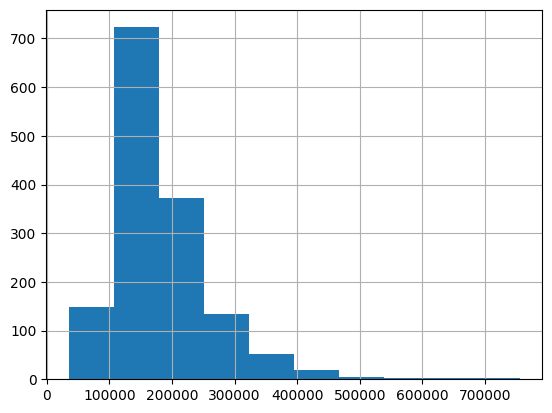

In [116]:
housing_train["SalePrice"].hist()

In [117]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

Before taking a look at the variables, I drop the ID column to reduce noise given id has nothing to do with sale price. 

In [118]:
# Drop Id column
housing_train.drop("Id", axis = 1, inplace = True)

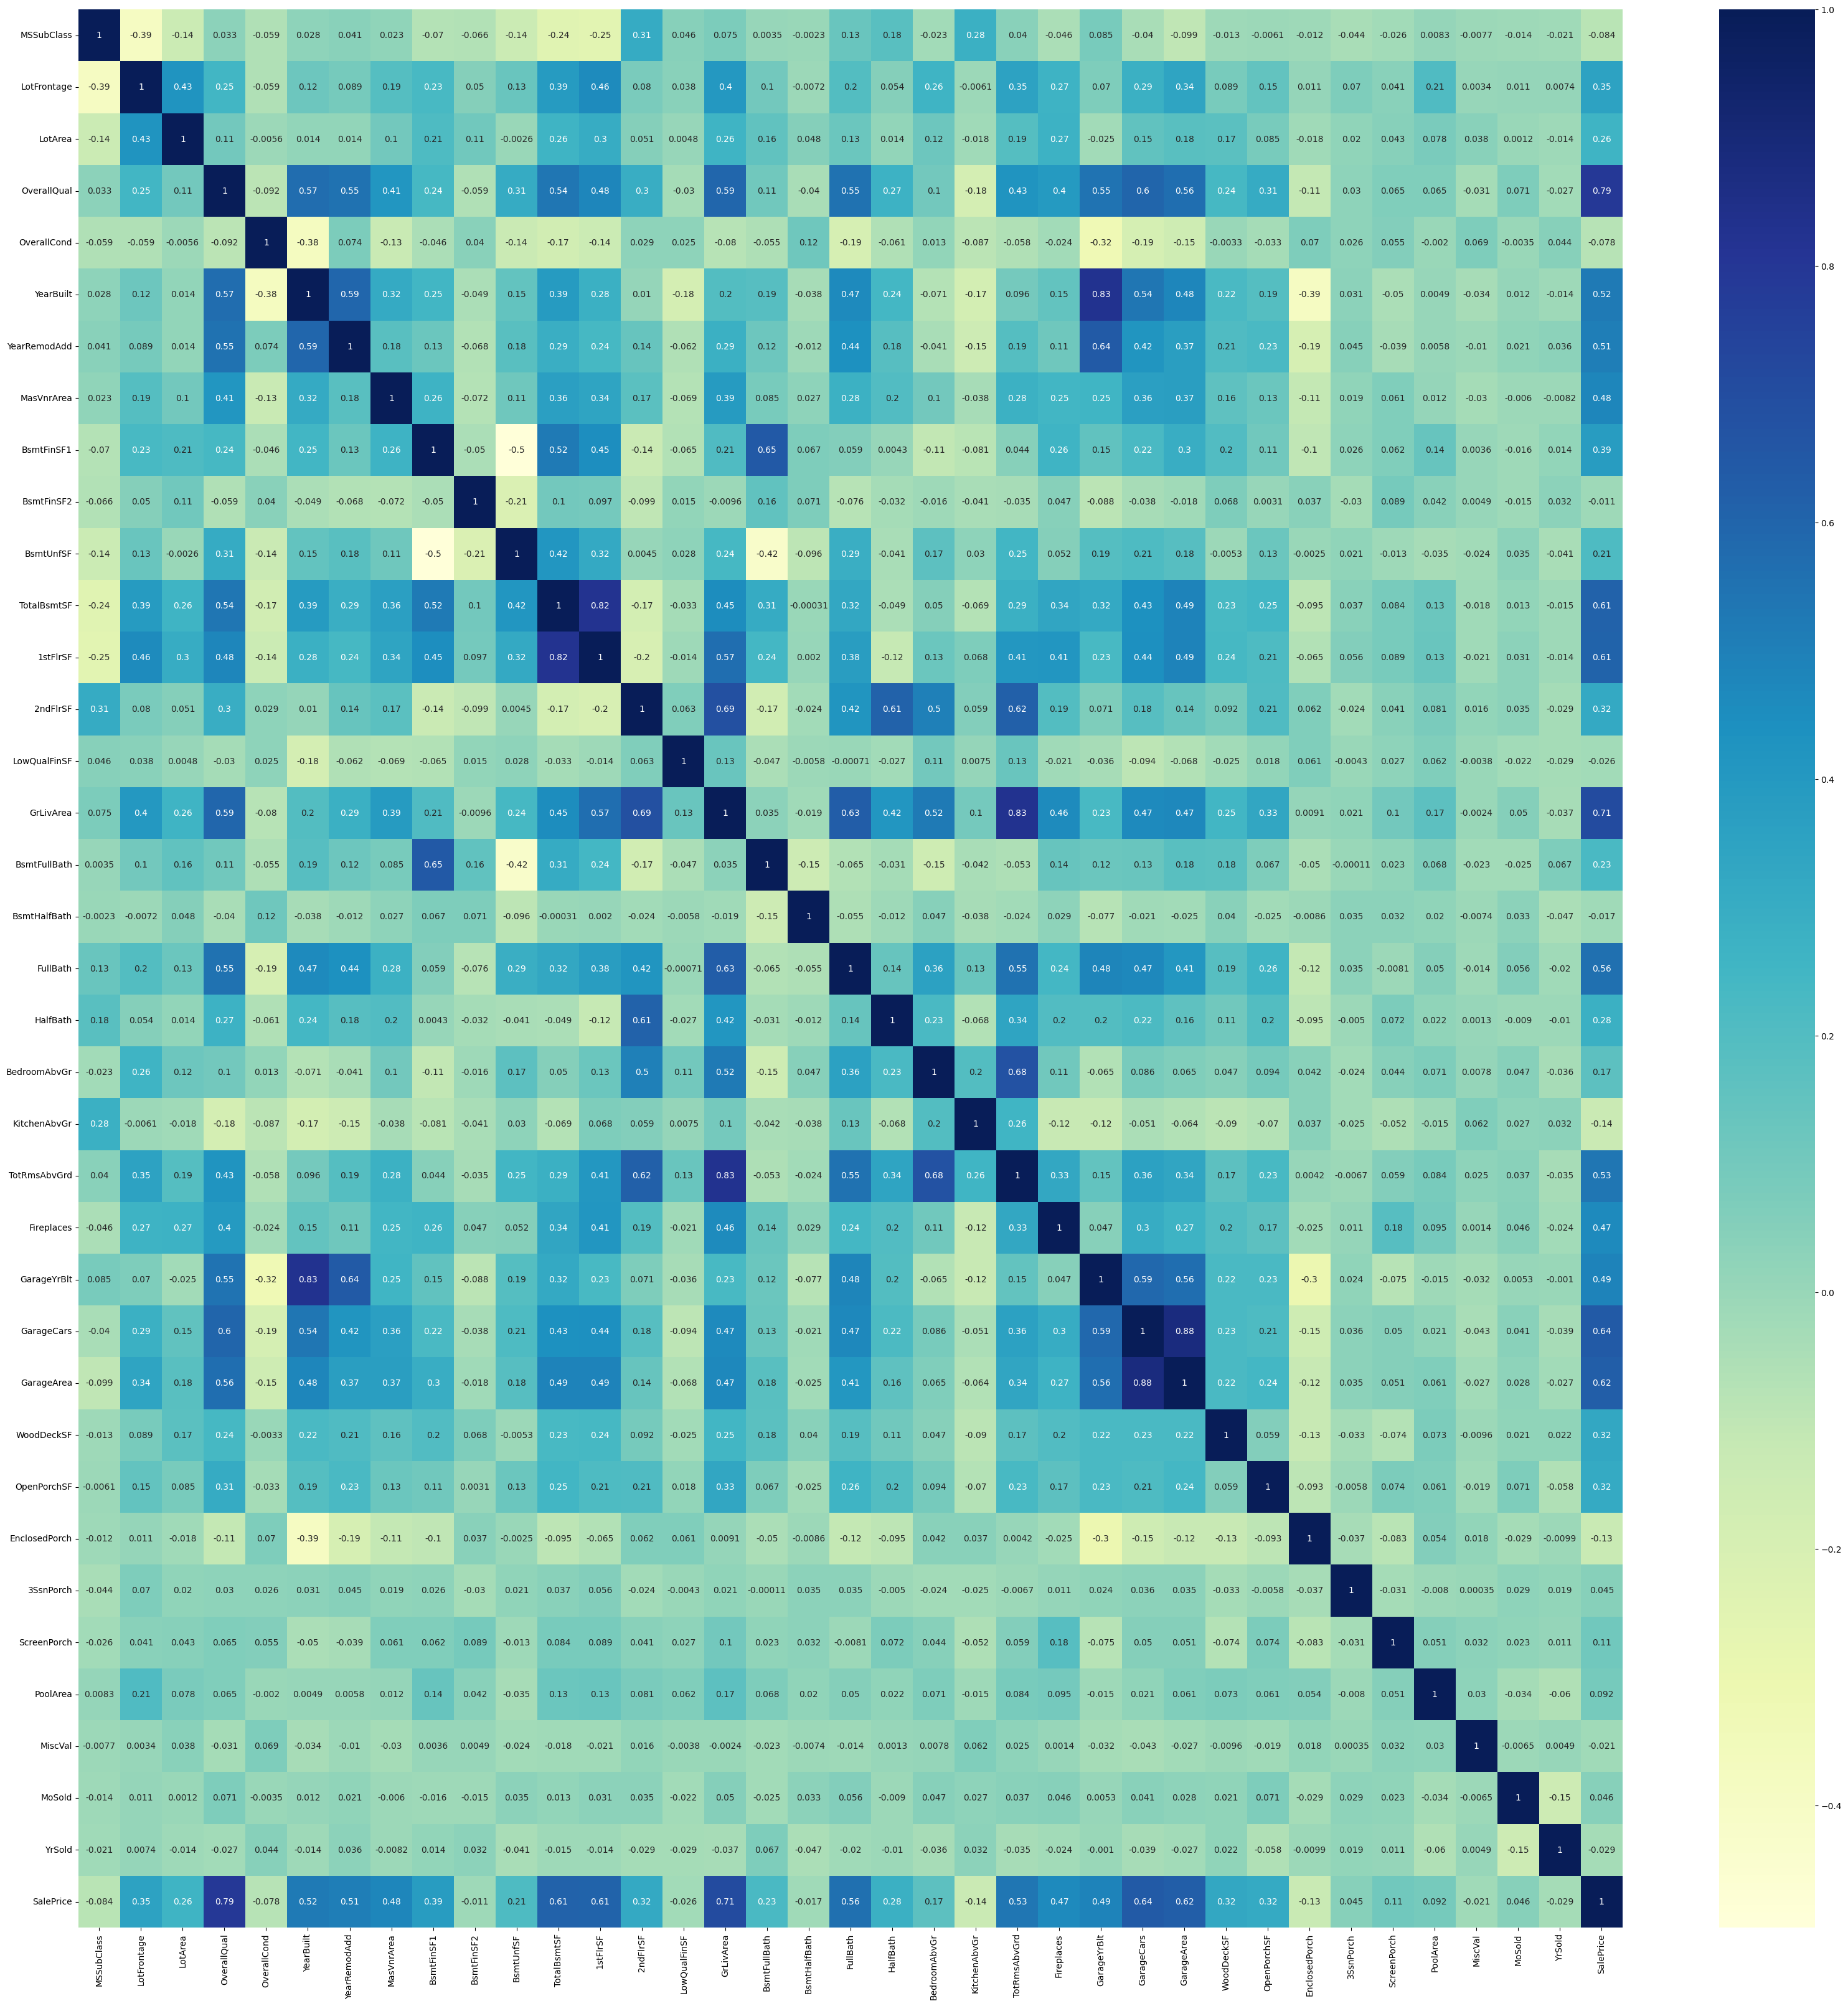

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(40,40))
sns.heatmap(housing_train.corr(numeric_only=True), annot=True, cmap="YlGnBu");

In [120]:
corr_matrix = housing_train.corr(numeric_only=True)
corr_matrix.shape

corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Based on the correlation matrix, OverallQual has the strongest positive correlation with SalePrice (0.79), suggesting that the overall quality of materials and finish is a key predictor of housing prices. Other features, such as GrLivArea (0.71), GarageCars (0.64), GarageArea (0.62), and TotalBsmtSF (0.61), also show significant positive correlations, indicating that larger living areas, garages, and basements have a substantial impact on sale prices.

There is also a high correlation between GarageCars and GarageArea (0.64), meaning these two features are closely related, as expected. Similarly, YearBuilt and GarageYrBlt (0.83) are highly correlated, potentially signifying that newer homes typically have newer garages.

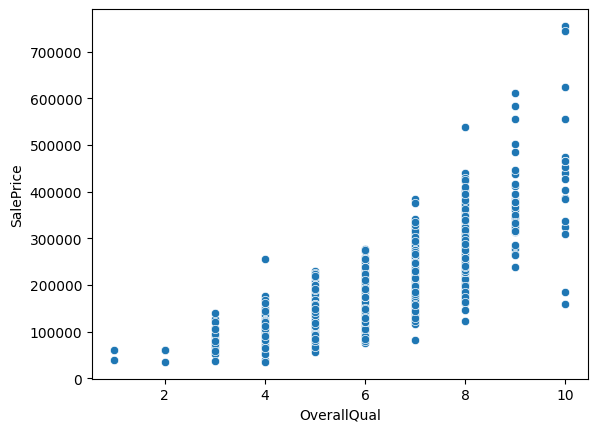

In [121]:
#look at overall quality and sale price 
sns.scatterplot(x='OverallQual',y='SalePrice',data=housing_train);

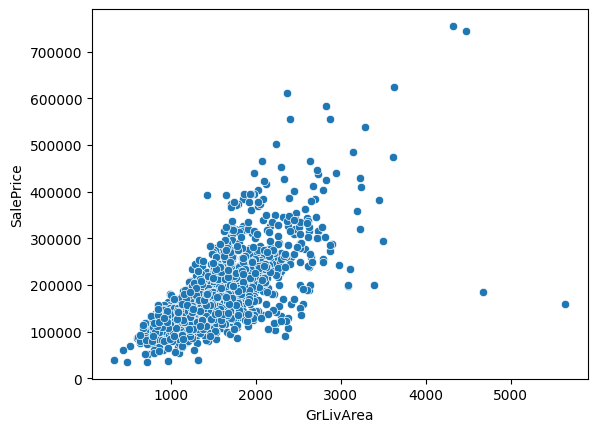

In [122]:
#look at gr liv area and sale price 
sns.scatterplot(x='GrLivArea',y='SalePrice', data=housing_train);

We can see a couple of outliers:
*  Good overall quality with low sale price 
* Good GrLivArea with low sale price 

These will be removed.

In [123]:
housing_train[(housing_train['OverallQual']>8) & (housing_train['SalePrice']<200000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [124]:
housing_train[(housing_train['GrLivArea']>4000) & (housing_train['SalePrice']<300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [125]:
#drop the outlier rows
housing_train = housing_train.drop(index=[523, 1298])

<b> Missing Values in Columns

In [126]:
def percent_missing(df):
    # calculates percentage
    percent_nan = 100 * df.isnull().sum() / len(df) 
    # filter greater than 0 and sort data
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [127]:
percent_nan = percent_missing(housing_train)
percent_nan

Electrical       0.068587
MasVnrArea       0.548697
BsmtQual         2.537723
BsmtCond         2.537723
BsmtFinType1     2.537723
BsmtExposure     2.606310
BsmtFinType2     2.606310
GarageCond       5.555556
GarageQual       5.555556
GarageFinish     5.555556
GarageYrBlt      5.555556
GarageType       5.555556
LotFrontage     17.764060
FireplaceQu     47.325103
MasVnrType      59.807956
Fence           80.727023
Alley           93.758573
MiscFeature     96.296296
PoolQC          99.588477
dtype: float64

There are a couple of columns that have a lot of missing values, so I decided to drop them if ~50% were null.

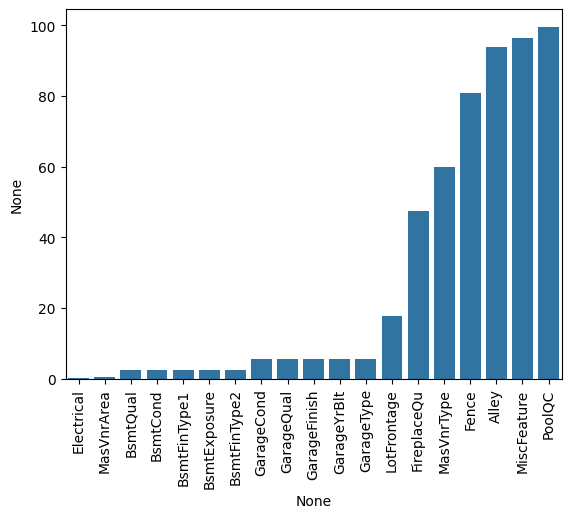

In [128]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [129]:
housing_train = housing_train.drop(['Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'MiscFeature'], axis=1)

housing_train.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


There are a lot of variables that seem to be NaN but are actually just empty, so we need to adjust it to 0 or None to better represent the values.

<b> Exploring columns with <1% missing values

In [130]:
percent_nan[percent_nan < 1]

Electrical    0.068587
MasVnrArea    0.548697
dtype: float64

In [131]:
housing_train[housing_train['Electrical'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,167500


In [132]:
housing_train[housing_train['MasVnrArea'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,NaN,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,216500
529,20,RL,NaN,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,200,0,0,0,0,3,2007,WD,Alloca,200624
650,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,205950
936,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2009,WD,Normal,184900
973,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,12,2008,New,Partial,182000
977,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,11,2007,New,Partial,199900
1243,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,New,Partial,465000
1278,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2008,WD,Normal,237000


Since these are small instances, I will drop the rows.

In [133]:
housing_train = housing_train.dropna(axis=0,subset=['Electrical','MasVnrArea']) #drop columns with missing values in Electrical and MasVnrArea

In [134]:
percent_nan = percent_missing(housing_train) #check proportion of missing values in remaining columns
percent_nan[percent_nan < 10]

BsmtQual        2.553485
BsmtCond        2.553485
BsmtFinType1    2.553485
BsmtExposure    2.622498
BsmtFinType2    2.622498
GarageType      5.590062
GarageYrBlt     5.590062
GarageFinish    5.590062
GarageQual      5.590062
GarageCond      5.590062
dtype: float64

I am assuming that the missing values in basement just mean there is no basement. Let's check below.

In [135]:
housing_train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [136]:
housing_train[housing_train['BsmtQual'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,10,2006,WD,Normal,90000
39,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,AdjLand,82000
90,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,109900
102,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2009,WD,Alloca,118964
156,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,109500
182,20,RL,60.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,180,0,0,0,6,2007,WD,Normal,120000
259,20,RM,70.0,12702,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,97000
342,90,RL,NaN,8544,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2006,WD,Normal,87500
362,85,RL,64.0,7301,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,177,0,0,0,0,7,2009,ConLD,Normal,198500
371,50,RL,80.0,17120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,134432


In [137]:
housing_train[housing_train['BsmtCond'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,10,2006,WD,Normal,90000
39,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,AdjLand,82000
90,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,109900
102,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2009,WD,Alloca,118964
156,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,109500
182,20,RL,60.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,180,0,0,0,6,2007,WD,Normal,120000
259,20,RM,70.0,12702,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,97000
342,90,RL,NaN,8544,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2006,WD,Normal,87500
362,85,RL,64.0,7301,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,177,0,0,0,0,7,2009,ConLD,Normal,198500
371,50,RL,80.0,17120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,134432


In [138]:
housing_train[housing_train['BsmtFinType1'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,10,2006,WD,Normal,90000
39,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,AdjLand,82000
90,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,109900
102,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2009,WD,Alloca,118964
156,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,109500
182,20,RL,60.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,180,0,0,0,6,2007,WD,Normal,120000
259,20,RM,70.0,12702,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,97000
342,90,RL,NaN,8544,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2006,WD,Normal,87500
362,85,RL,64.0,7301,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,177,0,0,0,0,7,2009,ConLD,Normal,198500
371,50,RL,80.0,17120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,134432


In [139]:
housing_train[housing_train['BsmtExposure'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,10,2006,WD,Normal,90000
39,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,AdjLand,82000
90,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,109900
102,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2009,WD,Alloca,118964
156,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,109500
182,20,RL,60.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,180,0,0,0,6,2007,WD,Normal,120000
259,20,RM,70.0,12702,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,97000
342,90,RL,NaN,8544,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2006,WD,Normal,87500
362,85,RL,64.0,7301,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,177,0,0,0,0,7,2009,ConLD,Normal,198500
371,50,RL,80.0,17120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2008,WD,Normal,134432


So by now, I am assuming the missing values all come from the same instances and are all null values because they do not have a basement, so we can replace the basement columns with None.

In [140]:
bsmt_str_cols =  ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2']
housing_train[bsmt_str_cols] = housing_train[bsmt_str_cols].fillna('None')

In [141]:
housing_train['BsmtFinType1']

0       GLQ
1       ALQ
2       GLQ
3       ALQ
4       GLQ
       ... 
1455    Unf
1456    ALQ
1457    GLQ
1458    GLQ
1459    BLQ
Name: BsmtFinType1, Length: 1449, dtype: object

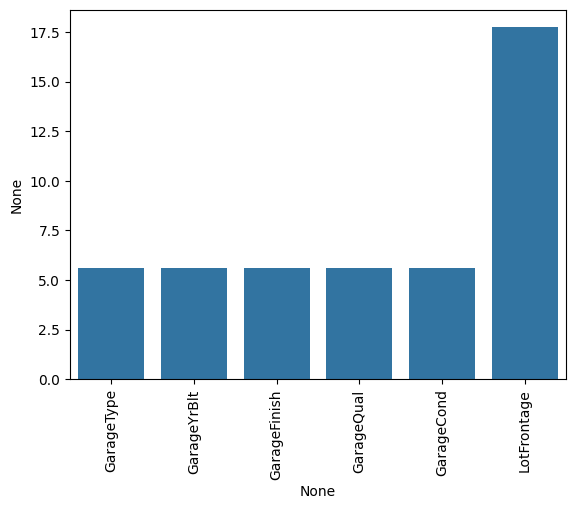

In [142]:
percent_nan = percent_missing(housing_train)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

Similar to basement, it could be the case that these values just don't have garages, so they are missing values for every garage feature.

In [143]:
housing_train['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [144]:
gar_str_cols = ['GarageType','GarageFinish','GarageQual','GarageCond']
housing_train[gar_str_cols] = housing_train[gar_str_cols].fillna('None')

In [145]:
housing_train['GarageYrBlt'] = housing_train['GarageYrBlt'].fillna(0)

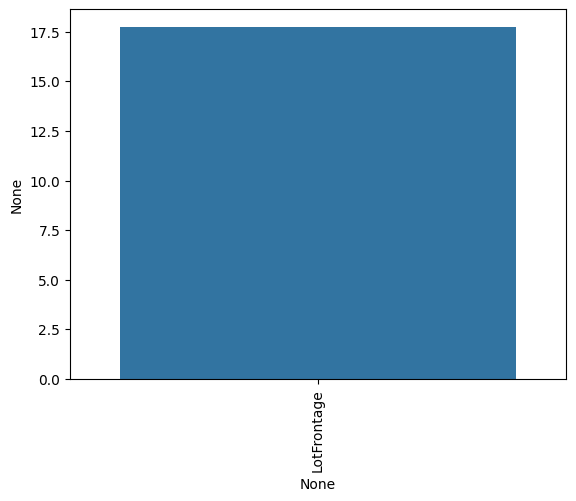

In [146]:
percent_nan = percent_missing(housing_train)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90); 

According to a Google search, "Lot frontage is the length of a lot's line that borders a public right-of-way or public space. It's a measurement that's taken in a single plane." So I assume the values are all very similar by neighborhood, which means we can take the mean of the neighborhood the house is in.

In [147]:
housing_train.groupby('Neighborhood')['LotFrontage'].mean()

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.656000
Crawfor    71.804878
Edwards    64.811111
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    91.878788
NridgHt    81.546667
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.591837
Somerst    64.653333
StoneBr    62.700000
Timber     80.379310
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [148]:
housing_train['LotFrontage'] = housing_train.groupby('Neighborhood')['LotFrontage'].transform(lambda value: value.fillna(value.mean()))

##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and test, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class.

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

<b> Splitting data into train, test, and validation 

In [149]:
from sklearn.model_selection import train_test_split

X = housing_train.drop(columns='SalePrice')  # features
y = housing_train['SalePrice']  # target variable

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#split train data into training and validation sets 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2 of original data

<b> Imputing, feature scaling, and transforming the training data into pipeline

In [150]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

#get numeric and categorical columns 
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

#create pipelines with imputer and scale 
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), #fill missing values
     ('std_scaler', StandardScaler())  # feature scaling numeric values 
])

categorical_pipeline = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='constant', fill_value='None')),  # fill missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

#combine the pipelines using ColumnTransformer
full_pipeline = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

X_train_prepared = full_pipeline.fit_transform(X_train) #call fit_transform to process training data
X_test_prepared = full_pipeline.transform(X_test) #transform without fitting 



## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 03x).


In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor

lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

def display_scores(model, X, y):
    mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-mse_scores)
    print(f"RMSE for {model.__class__.__name__}:")
    print(f"Scores: {rmse_scores}")
    print(f"Mean: {rmse_scores.mean():.2f}")
    print(f"Standard deviation: {rmse_scores.std():.2f}\n")

display_scores(lin_reg, X_train_prepared, y_train)
display_scores(tree_reg, X_train_prepared, y_train)
display_scores(forest_reg, X_train_prepared, y_train)



RMSE for LinearRegression:
Scores: [27603.37830317 26585.55850562 24301.76458023 23944.90068136
 26446.87457352]
Mean: 25776.50
Standard deviation: 1412.17

RMSE for DecisionTreeRegressor:
Scores: [44552.10670135 35402.43043275 41035.76511067 44819.61070788
 42632.29042083]
Mean: 41688.44
Standard deviation: 3430.32

RMSE for RandomForestRegressor:
Scores: [29459.43103175 31175.45569097 24760.45977041 28142.81772673
 29538.01613314]
Mean: 28615.24
Standard deviation: 2154.13



It appears Linear regression has the best performance of the three models, with the lowest mean RMSE of 25,776.50. It is important to note, however, that the Random Forest Regression model also performed comparably well with a mean RMSE of 28,615.24, suggesting more consistent results, with the Decision Tree model performing the worst out of the three.

## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

In [152]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing numeric values
    ('std_scaler', StandardScaler())  # Feature scaling for numeric values
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),  # Fill missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))  # One-hot encoding
])

full_pipeline = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

full_model_pipeline = Pipeline(steps=[
    ('preprocessor', full_pipeline),  
    ('regressor', Ridge())  # placeholder for the regression model, source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
])

param_grid = [
    {
        'regressor': [Ridge()],  # Ridge regression
        'regressor__alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
        'regressor__solver': ['auto', 'svd', 'cholesky']  # Different solvers for Ridge
    },
    {
        'regressor': [Lasso()],  # Lasso regression
        'regressor__alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength for Lasso
        'regressor__max_iter': [1000, 5000, 10000]  # Maximum number of iterations
    }
]

grid_search = GridSearchCV(full_model_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF...
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                       ('regressor', Ridge())]),
             param_grid=[{'regressor': [Ridge()],
                          'regressor__alpha': [0.1, 1.0, 10.0, 100.0],
                          'regressor__solver': ['auto', 'svd', 'cholesky']},
                         {'regressor': [Lasso()],
                          'regressor__alpha': [0.1, 1.0, 10.0, 100.0],
                          'regressor__max_iter': [1000, 5000, 10000]}],
             scoring='neg_mean_squared_error', verbose=1)

In [153]:
best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)
print("Best model:", best_model)

Best hyperparameters: {'regressor': Ridge(), 'regressor__alpha': 10.0, 'regressor__solver': 'svd'}
Best model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',...
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir'

In [154]:
cv_scores = cross_val_score(best_model, X_train, y_train, 
                            scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-cv_scores)

# Print the RMSE and standard deviation of RMSE
print(f"5-Fold CV RMSE: {rmse_scores.mean():.2f}")
print(f"Standard Deviation of RMSE: {rmse_scores.std():.2f}")

5-Fold CV RMSE: 23174.48
Standard Deviation of RMSE: 1794.74


In [155]:
from sklearn.metrics import mean_squared_error
import math

final_predictions = best_model.predict(X_test)
final_rmse = math.sqrt(mean_squared_error(y_test, final_predictions))
print(f"Test Set RMSE: {final_rmse:.2f}") 

Test Set RMSE: 22286.78


In [156]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, final_predictions)
lin_mae

15412.607186339897

Computing a 95% confidence interval for the test RSME 

In [157]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([18356.25387799, 25621.26488597])

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

5-Fold CV RMSE: 23174.48

I developed a predictive model using Random Forest regression to estimate housing prices based on various property features in Ames, Iowa. Given the complexity of the housing market, this model demonstrated a strong performance in its ability to predict housing prices within $23,174.48 of margin of error on average. Throughout the project, I learned that key factors, such as lot area, overally property quality, living area size, and garage features play significant roles in price prediction. Moving forward, it is critical to collect more features consistently to make these predictions more accurate, as it is hard to tell what actually matters when predicting the right price as seen by the significance of having a large garage over the location. Some examples of extra features can include neighborhood safety, crime rates, and more quantitative data like average median residential income. Additionally, it would be worth utilizing more complex models to help improve the model's performance in capturing more nuanced relationships.




## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!